# PROJECT 2 - BAR CRAWL ANALYSIS

**Mount the Google Drive on the notebook so there becomes easy access to the files used**

### **1.) IMPORT DATA**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This is the current location where my file is kept in the drive
%cd /content/drive/MyDrive/FDA2/

/content/drive/MyDrive/FDA2


Load the libraries necessary for the dataset and further calculations of permutation entropy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('all_accelerometer_data_pids_13.csv')


Read the accelerometer data containing x,y,z values, timestamp, PID values

In [5]:
df

time     pid         x         y         z
0                     0  JB3156  0.000000  0.000000  0.000000
1                     0  CC6740  0.000000  0.000000  0.000000
2         1493733882409  SA0297  0.075800  0.027300 -0.010200
3         1493733882455  SA0297 -0.035900  0.079400  0.003700
4         1493733882500  SA0297 -0.242700 -0.086100 -0.016300
...                 ...     ...       ...       ...       ...
14057562  1493829248196  CC6740 -0.133956  0.124726 -0.010736
14057563  1493829248220  CC6740 -0.100764  0.180872  0.046449
14057564  1493829248245  CC6740 -0.131853  0.195934  0.181088
14057565  1493829248270  CC6740 -0.149704  0.194482  0.202393
14057566  1493829248294  CC6740 -0.107288  0.153548  0.168595

[14057567 rows x 5 columns]

### **DATA CLEANING**




In [6]:
# See if there are any possible missing values

df.isnull().sum()

time    0
pid     0
x       0
y       0
z       0
dtype: int64

In [7]:
# Check the data types

df.dtypes

time      int64
pid      object
x       float64
y       float64
z       float64
dtype: object

In [8]:
df.head(10)

time     pid       x       y       z
0              0  JB3156  0.0000  0.0000  0.0000
1              0  CC6740  0.0000  0.0000  0.0000
2  1493733882409  SA0297  0.0758  0.0273 -0.0102
3  1493733882455  SA0297 -0.0359  0.0794  0.0037
4  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
5  1493733883945  SA0297 -0.2888  0.0514 -0.0145
6  1493733883953  SA0297 -0.0413 -0.0184 -0.0105
7  1493733883957  SA0297 -0.0413 -0.0001  0.0017
8  1493733883963  SA0297 -0.0286 -0.0028 -0.0094
9  1493733883974  SA0297 -0.0543 -0.0410 -0.0109

In [9]:
df = df.drop([0, 1]).reset_index(drop=True)


Two first rows contain invalid data as the time stamp is 0. So we will remove the first two rows from the dataset.

In [10]:
df.head(10)

time     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105
5  1493733883957  SA0297 -0.0413 -0.0001  0.0017
6  1493733883963  SA0297 -0.0286 -0.0028 -0.0094
7  1493733883974  SA0297 -0.0543 -0.0410 -0.0109
8  1493733883977  SA0297  0.0070 -0.0050 -0.0849
9  1493733883991  SA0297 -0.0561 -0.0226  0.0134

In [11]:
df = df.rename(columns={"time":"timestamp"})

df.head()

timestamp     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105

In [12]:
df['timestamp'] = (df['timestamp'])//1000


The timestamp values, originally in milliseconds, are scaled down and divided by 1000 for easier analysis and the time column is also renamed to timestamp for merging the different PID datasets and accelerometer dataset easily.

## 3.) **DATA MERGING**

In [13]:
# Taking any one of the Participant ID dataset


df_SA0297 = pd.read_csv('SA0297_clean_TAC.csv')

df_BK7610 = pd.read_csv('BK7610_clean_TAC.csv')

df_BU4707 = pd.read_csv('BU4707_clean_TAC.csv')

df_CC6740 = pd.read_csv('CC6740_clean_TAC.csv')

df_DC6359 = pd.read_csv('DC6359_clean_TAC.csv')

df_DK3500 = pd.read_csv('DK3500_clean_TAC.csv')

df_HV0618 = pd.read_csv('HV0618_clean_TAC.csv')

df_JB3156 = pd.read_csv('JB3156_clean_TAC.csv')

df_JR8022 = pd.read_csv('JR8022_clean_TAC.csv')

df_MC7070 = pd.read_csv('MC7070_clean_TAC.csv')

df_MJ8002 = pd.read_csv('MJ8002_clean_TAC.csv')

df_PC6771 = pd.read_csv('PC6771_clean_TAC.csv')

df_SF3079 = pd.read_csv('SF3079_clean_TAC.csv')

Read all the individual data files of PID values

In [14]:
import pandas as pd

# Load accelerometer data

# Define a function to merge accelerometer data with TAC data for each PID
def merge_data(pid):
    df_tac_pid = globals()[f"df_{pid}"]
    df_pid = df[df['pid'] == pid]
    merged_data_pid = pd.merge(df_tac_pid, df_pid, on='timestamp')
    return merged_data_pid

# List of all PIDs
pids = ['SA0297', 'BK7610', 'BU4707', 'CC6740', 'DC6359', 'DK3500', 'HV0618', 'JB3156', 'JR8022', 'MC7070', 'MJ8002', 'PC6771', 'SF3079']

# Dictionary to store merged dataframes for each PID
merged_data_dict = {}

# Iterate over each PID, merge accelerometer data with TAC data, and store in dictionary
for pid in pids:
    merged_data_pid = merge_data(pid)
    merged_data_dict[pid] = merged_data_pid

# Access merged dataframes for all PIDs
for pid, merged_data_pid in merged_data_dict.items():
    print(f"Merged data for PID {pid}:")
    merged_data_pid


Merged data for PID SA0297:
Merged data for PID BK7610:
Merged data for PID BU4707:
Merged data for PID CC6740:
Merged data for PID DC6359:
Merged data for PID DK3500:
Merged data for PID HV0618:
Merged data for PID JB3156:
Merged data for PID JR8022:
Merged data for PID MC7070:
Merged data for PID MJ8002:
Merged data for PID PC6771:
Merged data for PID SF3079:


This code shows how to merge accelerometer data with Transdermal Alcohol Content (TAC) data for multiple PID'S.

### merge_data Function
The merge_data function is designed to merge the accelerometer data for a specific participant (PID) with their corresponding TAC data based on matching timestamps.

A list named pids contains the IDs of all participants for whom the data need to be merged and an empty dictionary merged_data_dict is initialized to store the merged DataFrames, with PIDs serving as keys.

In [15]:

merged_data_MC7070 = merged_data_dict['MC7070']

print("Merged data for PID MC7070:")
merged_data_MC7070


Merged data for PID MC7070:


timestamp  TAC_Reading     pid       x       y       z
0    1493746471     0.091933  MC7070  0.0013 -0.0008  0.0075
1    1493746471     0.091933  MC7070 -0.0007  0.0014  0.0069
2    1493746471     0.091933  MC7070 -0.0007  0.0002  0.0070
3    1493746471     0.091933  MC7070  0.0005 -0.0007  0.0074
4    1493746471     0.091933  MC7070 -0.0021 -0.0002  0.0072
..          ...          ...     ...     ...     ...     ...
186  1493781487     0.142696  MC7070 -0.0113  0.0084  0.0104
187  1493781487     0.142696  MC7070 -0.0105  0.0094  0.0095
188  1493781487     0.142696  MC7070 -0.0062  0.0046  0.0056
189  1493781487     0.142696  MC7070 -0.0018 -0.0011  0.0015
190  1493781487     0.142696  MC7070 -0.0038  0.0045  0.0112

[191 rows x 6 columns]

Retrieve Merged Data for DataFrame MC7070 and then print it

Graphical Representation: For each PID, subplots are generated to visually represent acceleration in the x, y, z directions, and TAC readings over time. This visualization allows for an analysis of how physical movements correlate with changes in alcohol levels.
The acceleration plots for the x, y, z axes over time showcase the intensity and patterns of physical activity.
TAC Reading Plot: The TAC readings plot reveals how alcohol concentration levels change over time.


<ipython-input-16-792c83bd2e4c>:19: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(timestamp, "x", data=merged_data_pid)
<ipython-input-16-792c83bd2e4c>:22: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(timestamp, "y", data=merged_data_pid)


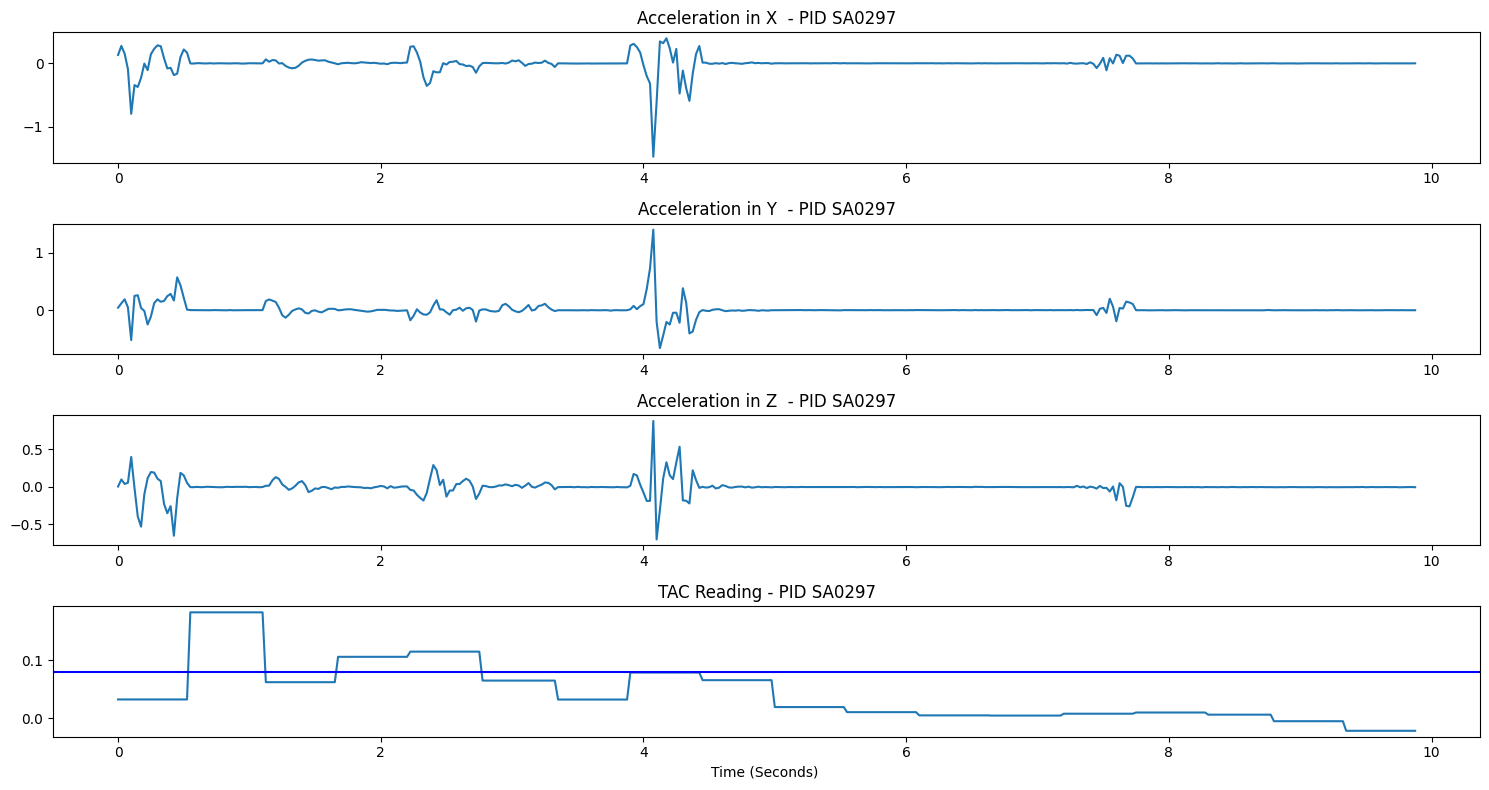

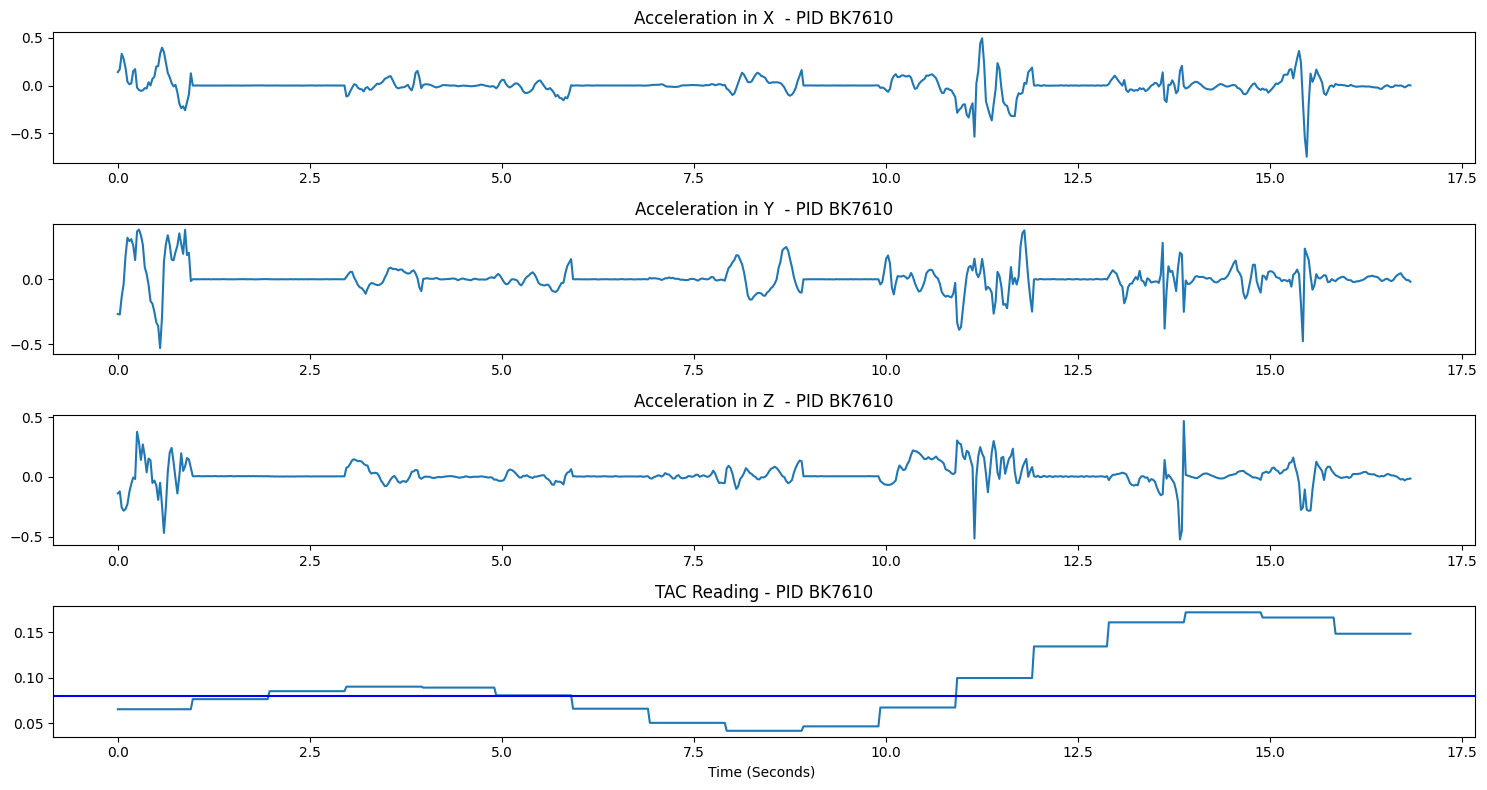

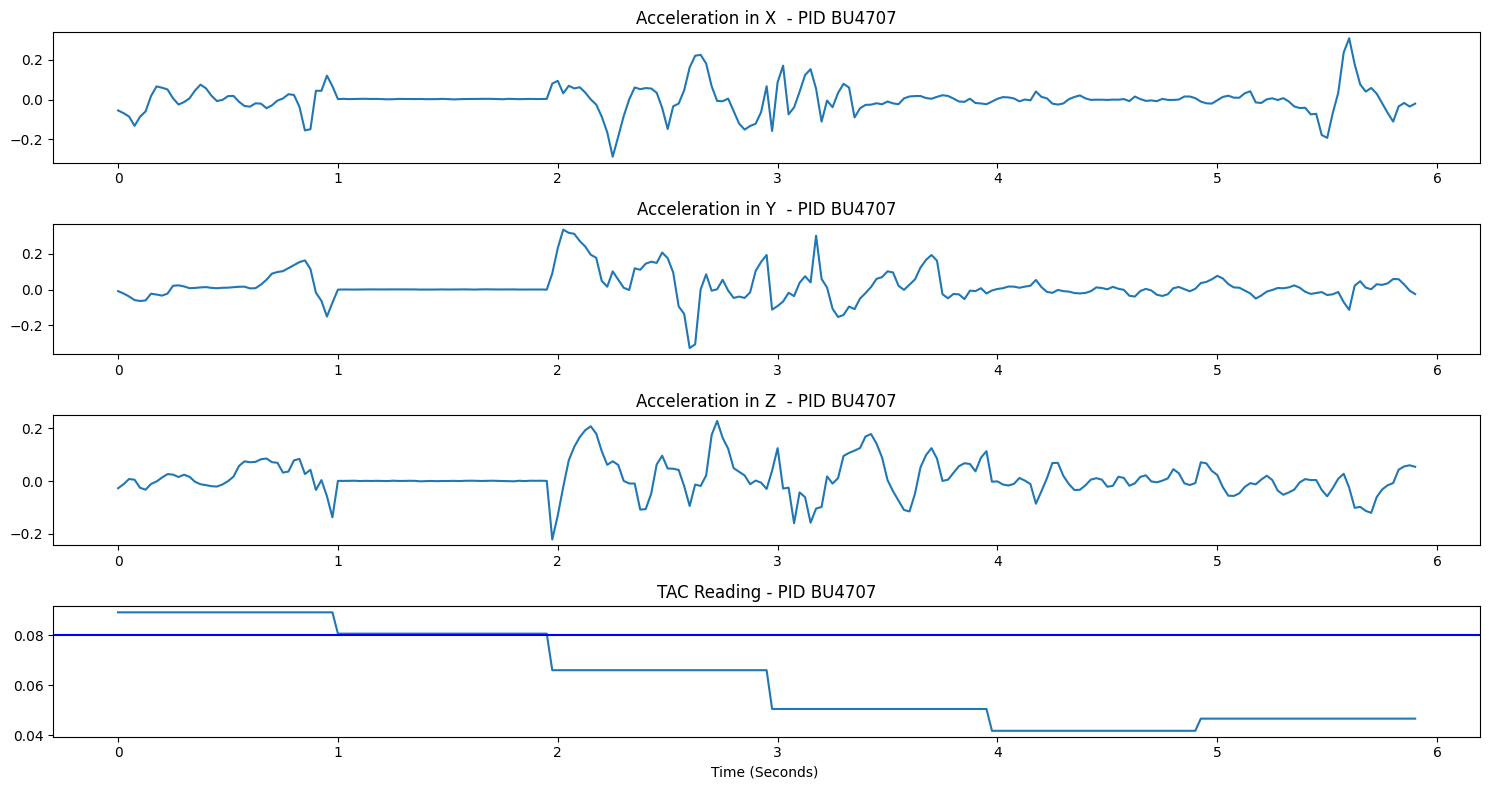

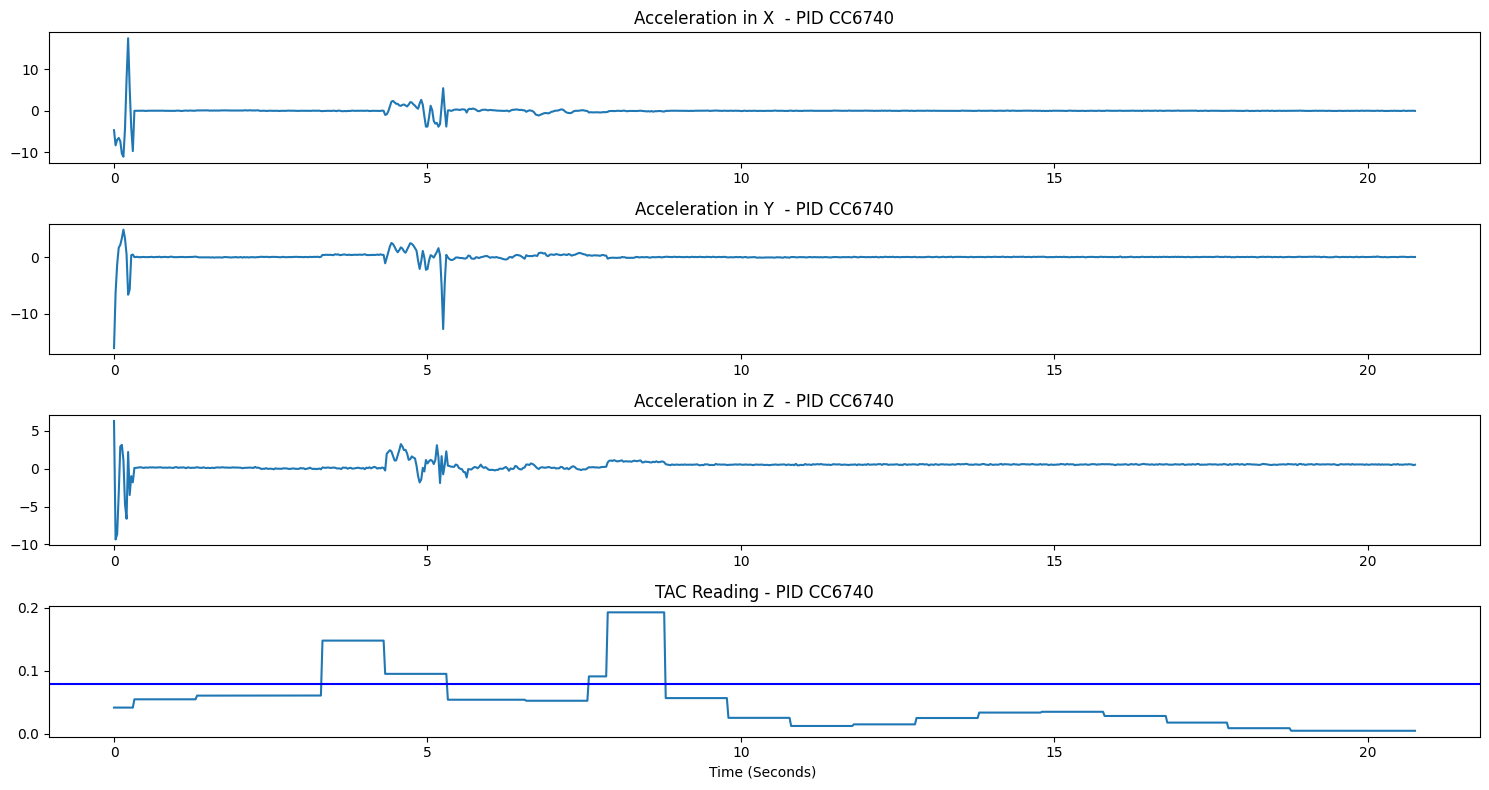

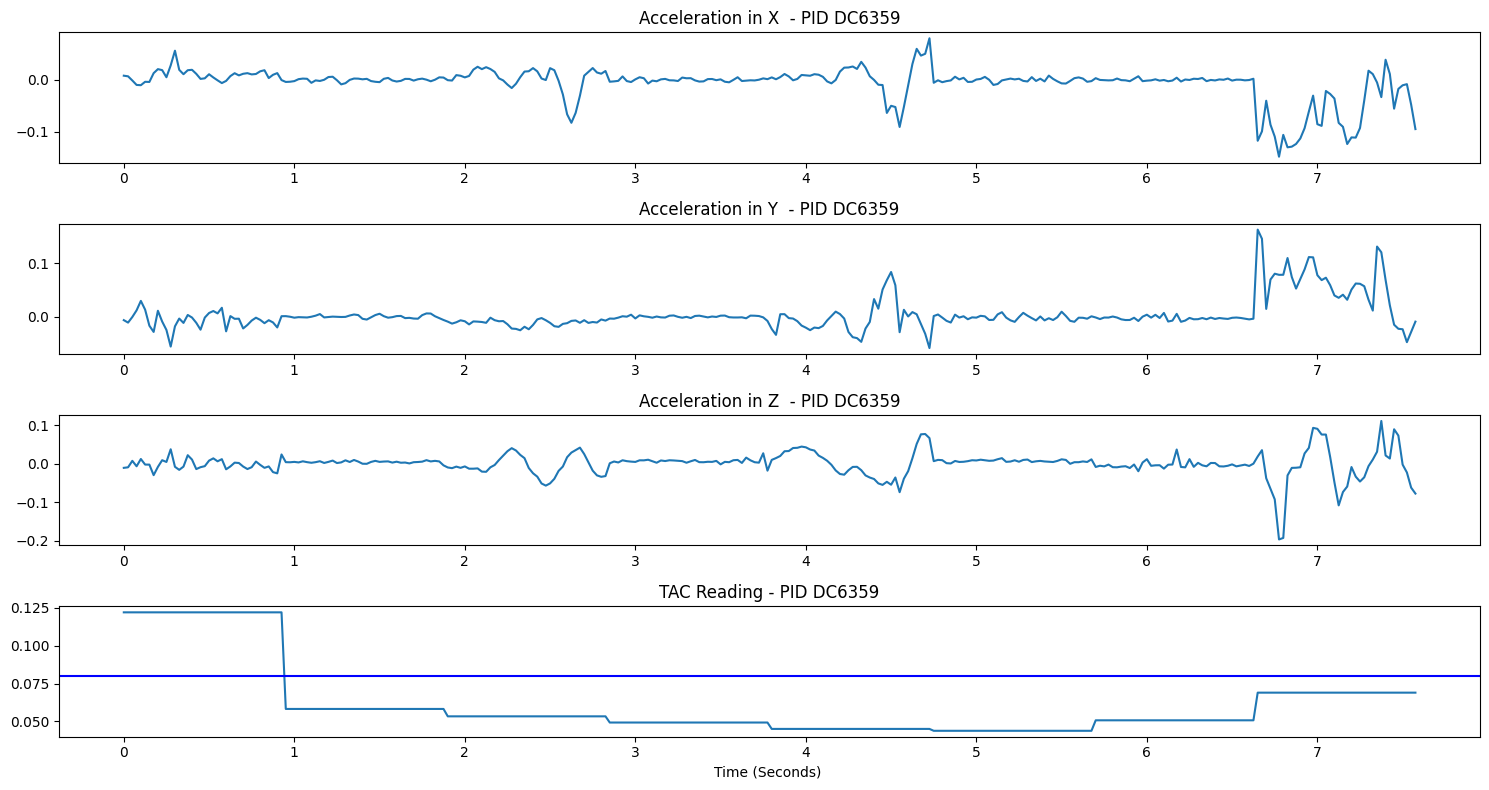

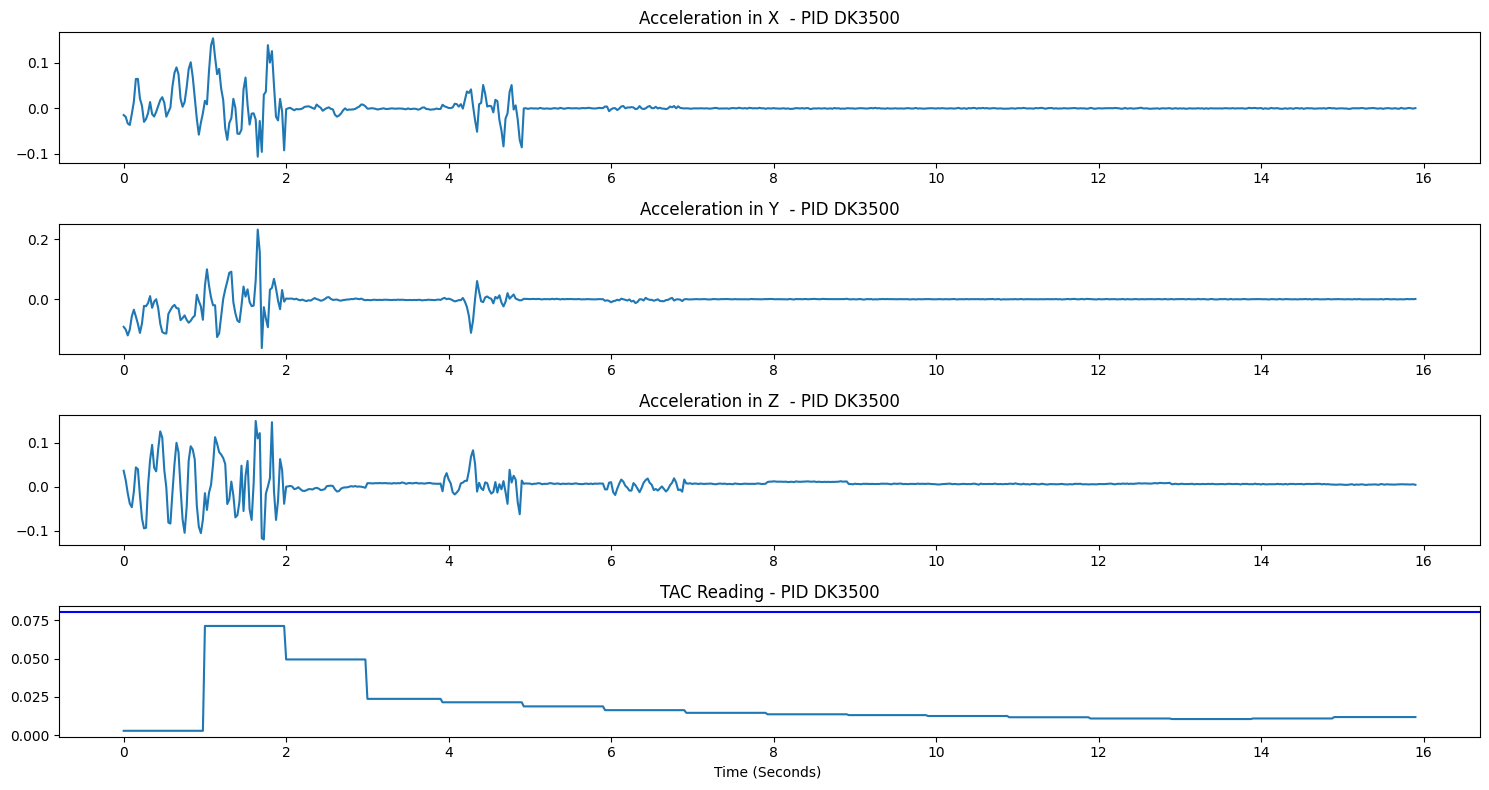

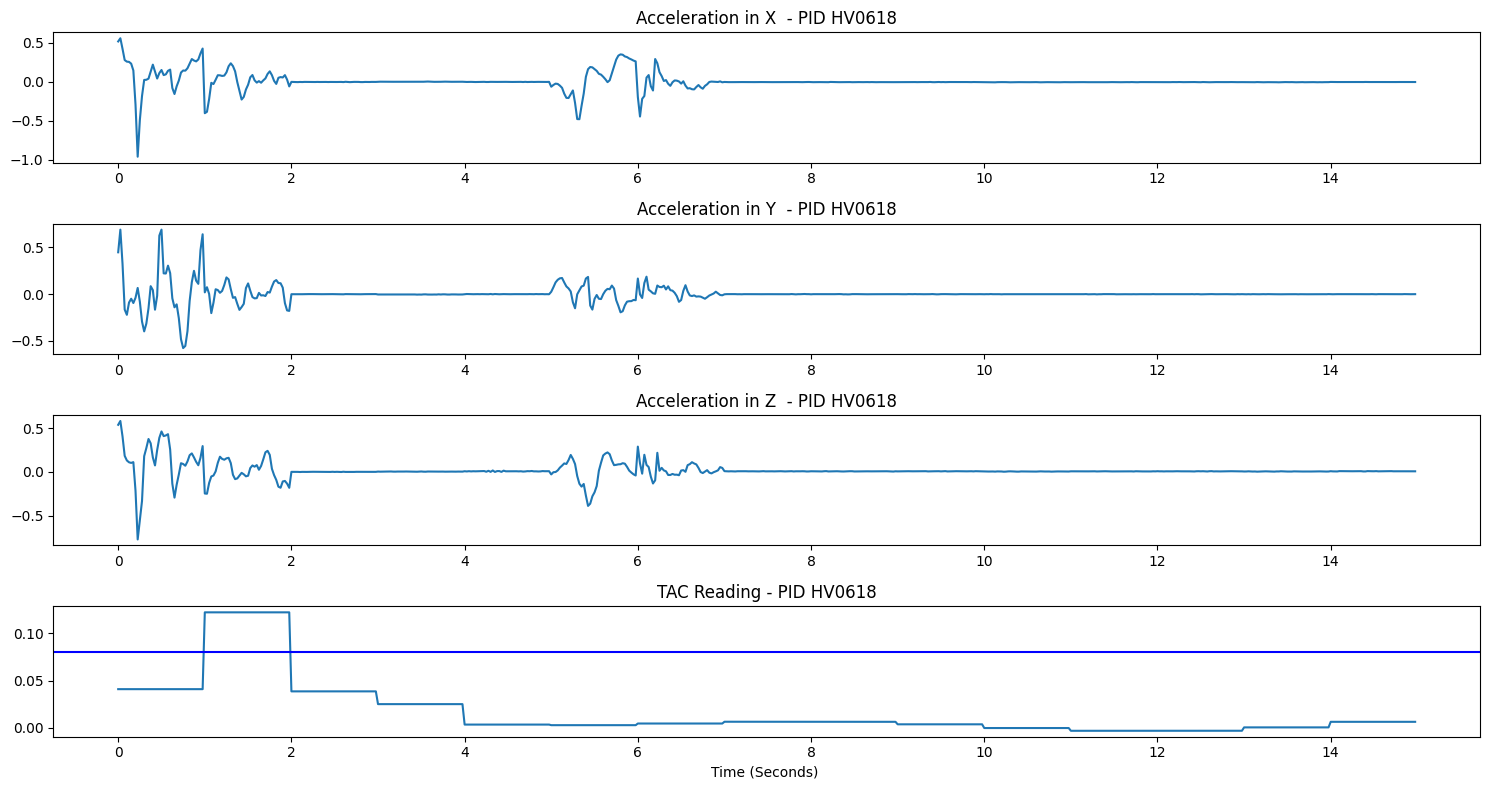

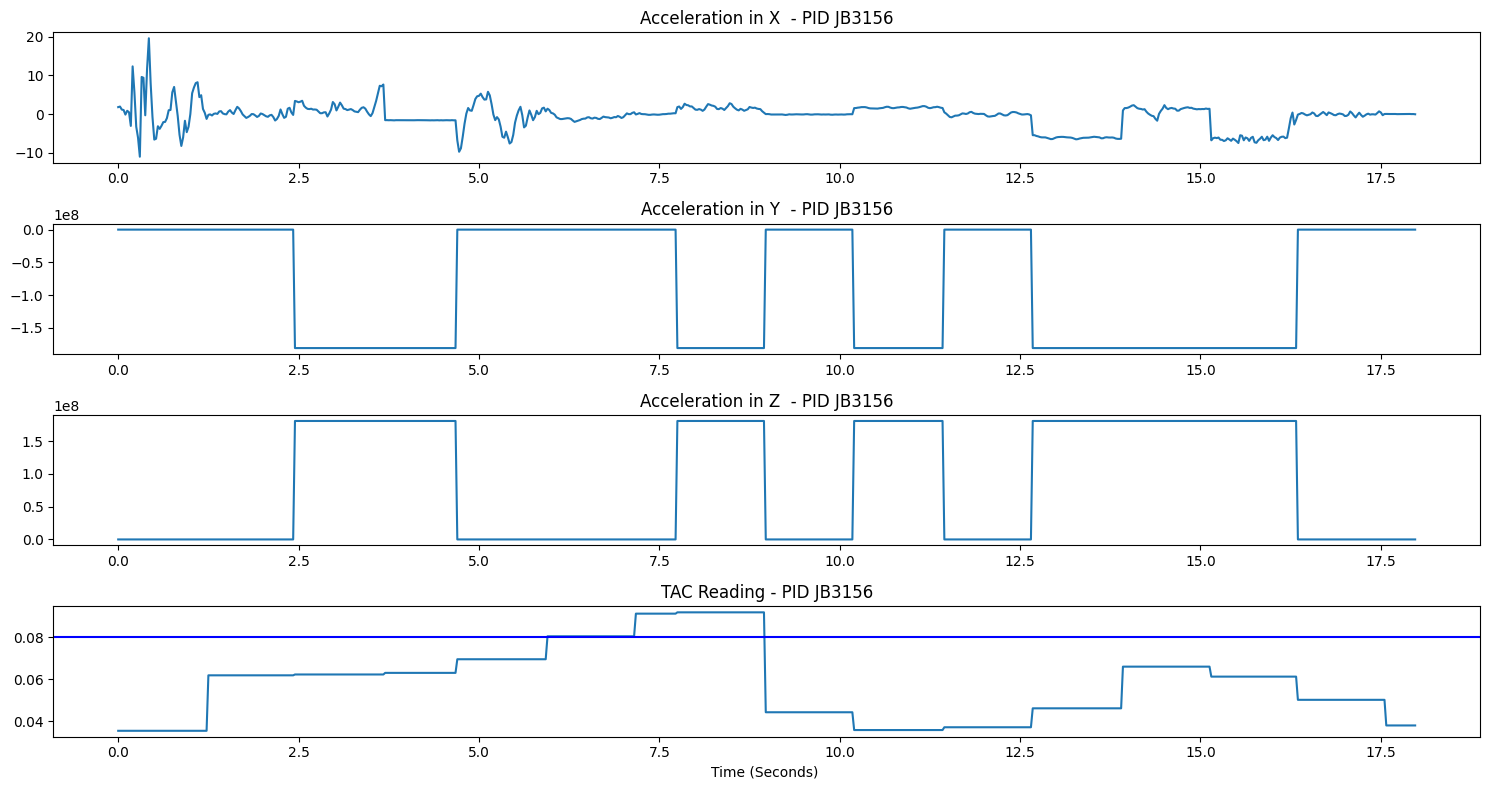

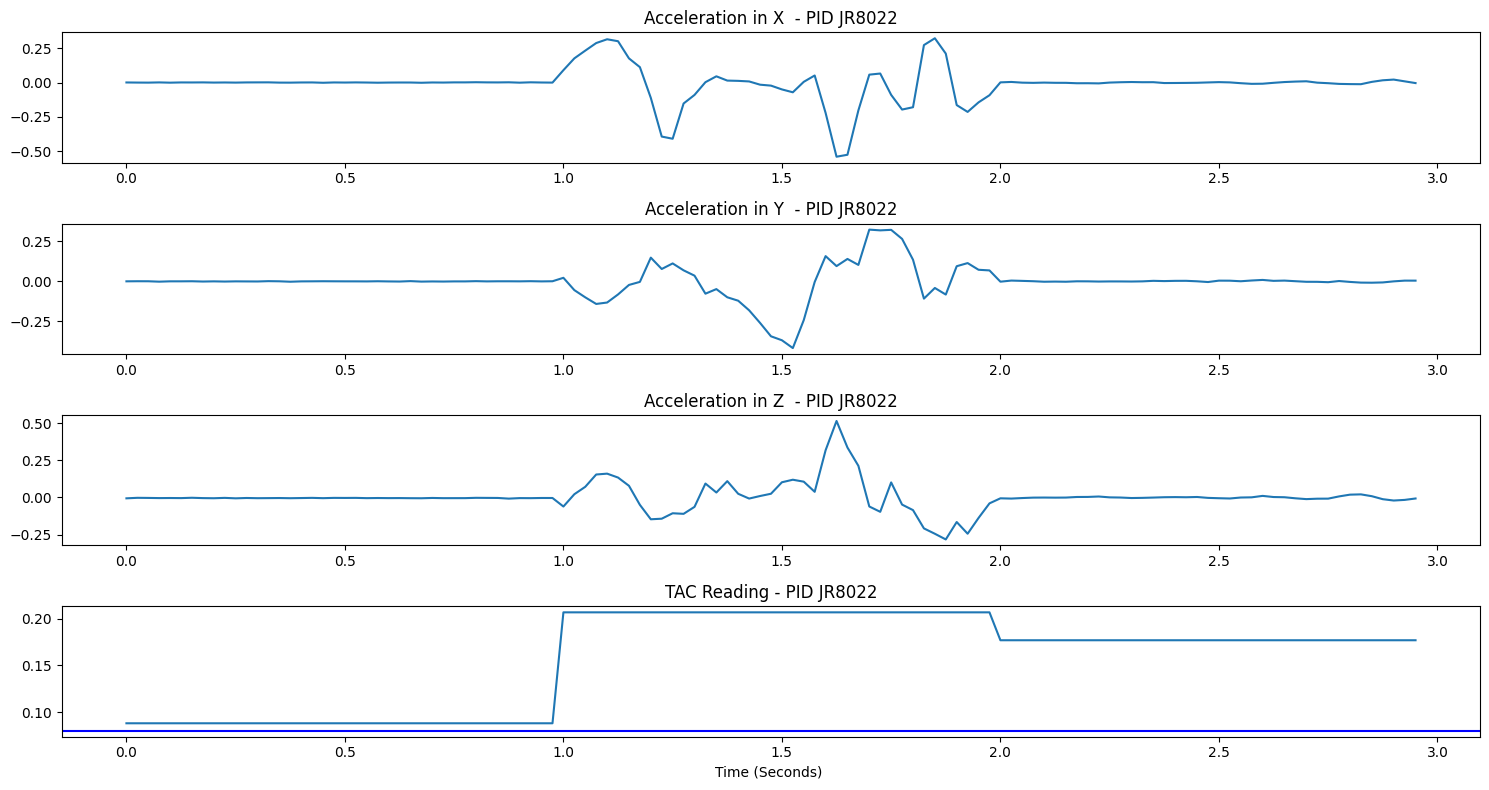

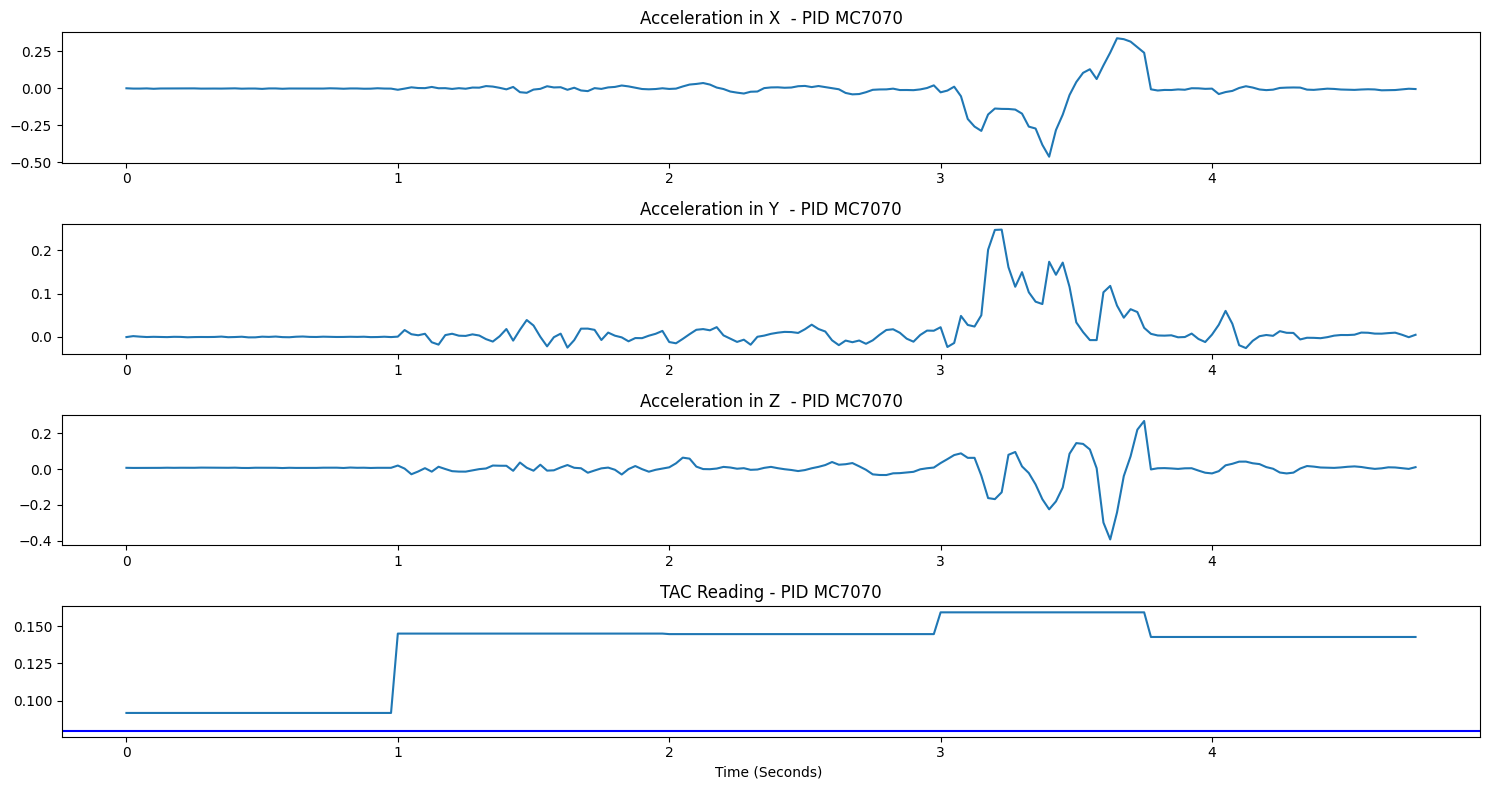

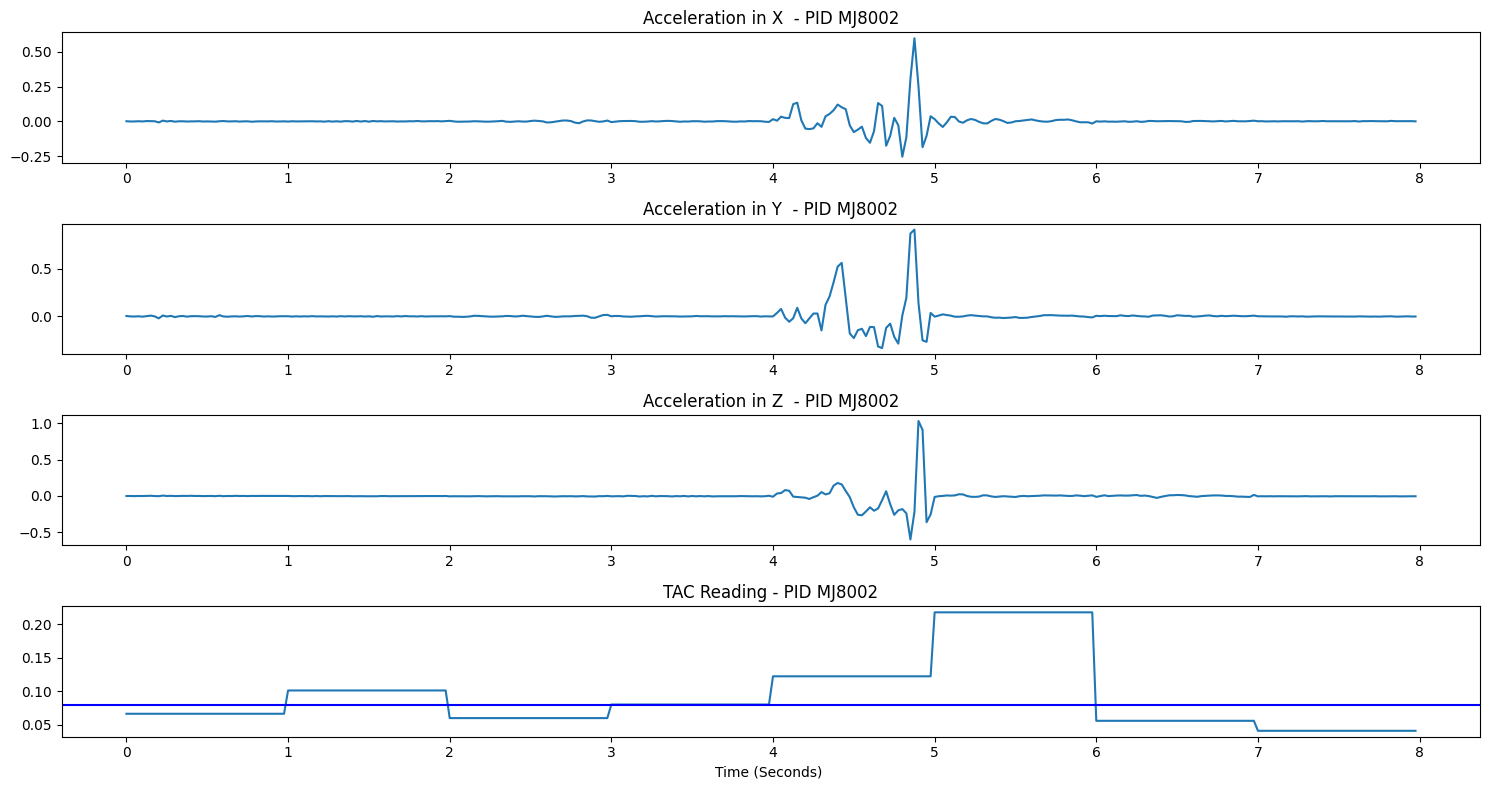

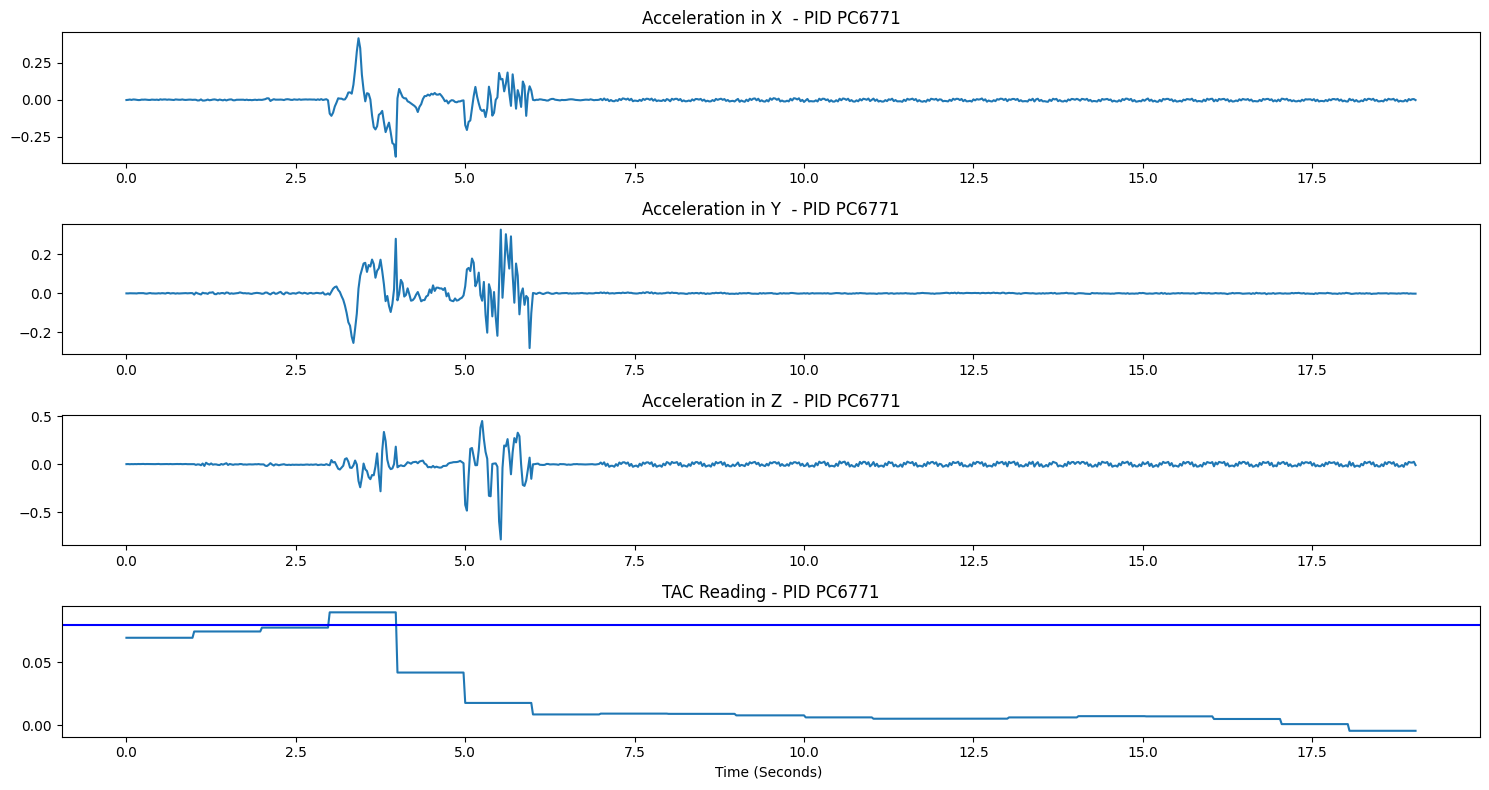

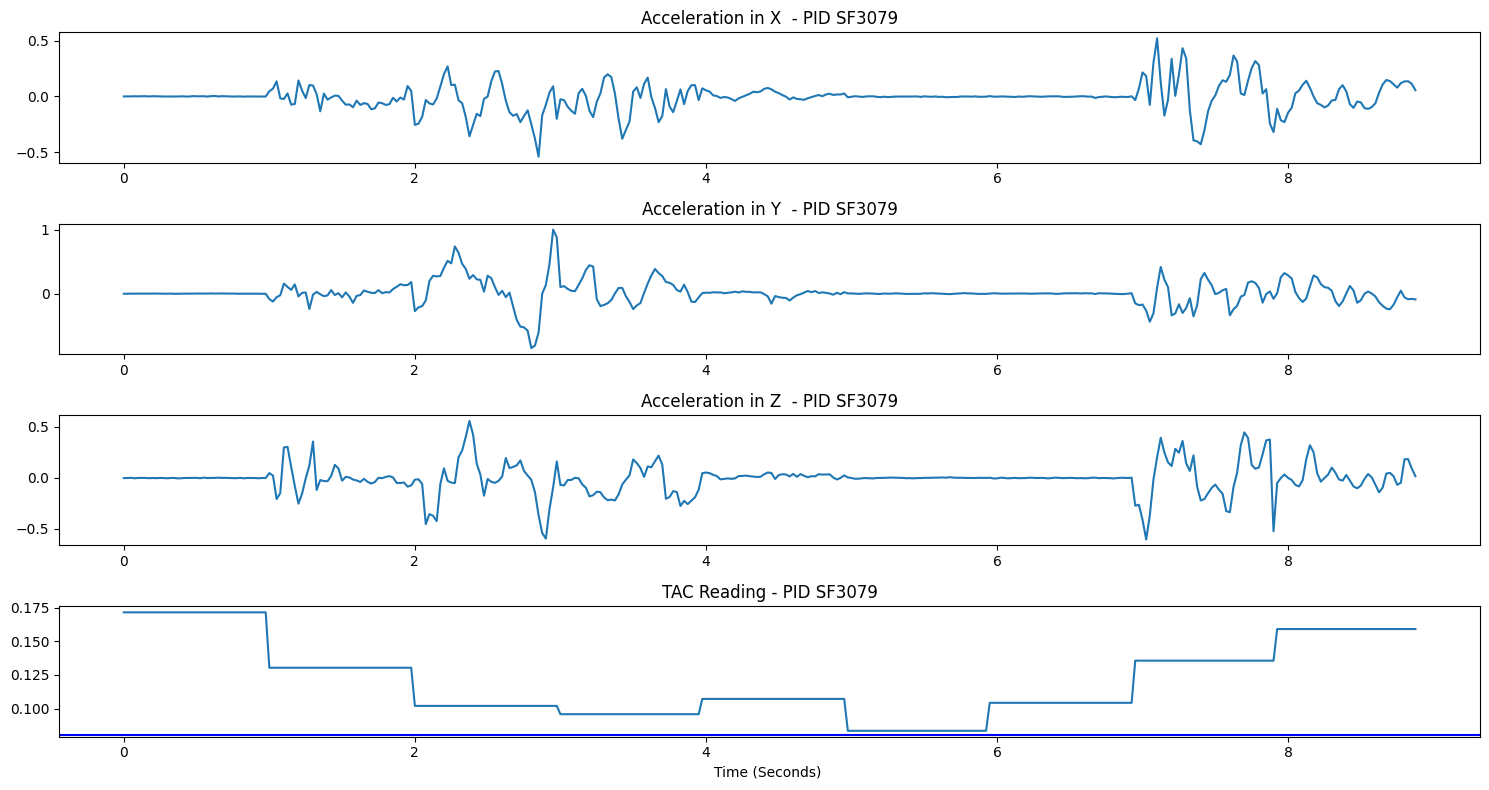

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Iterate over each PID
for pid in merged_data_dict:

    merged_data_pid = merged_data_dict[pid]

    # Generate timestamp array
    timestamp = np.arange(merged_data_pid['x'].size) / 40

    # Create subplots
    fig, ax = plt.subplots(4, figsize=(15, 8))

    # Set common x-label
    plt.xlabel("Time (Seconds) ")

    # Plot acceleration in x direction
    ax[0].plot(timestamp, "x", data=merged_data_pid)

    # Plot acceleration in y direction
    ax[1].plot(timestamp, "y", data=merged_data_pid)

    # Plot acceleration in z direction
    ax[2].plot(timestamp, "z", data=merged_data_pid)

    # Plot TAC Reading
    ax[3].plot(timestamp, "TAC_Reading", data=merged_data_pid)
    ax[3].axhline(y=0.08, color='b', linestyle='-')

    # Add subplot titles
    ax[0].set_title(f"Acceleration in X  - PID {pid}")
    ax[1].set_title(f"Acceleration in Y  - PID {pid}")
    ax[2].set_title(f"Acceleration in Z  - PID {pid}")
    ax[3].set_title(f"TAC Reading - PID {pid}")

    # Adjust layout
    plt.tight_layout() # Used to adjust the size and positions of the elements

    plt.show()


<ipython-input-17-6cc5e0e8b116>:39: RuntimeWarning: invalid value encountered in scalar divide
  return s_entropy(p) / max_entropy
<ipython-input-17-6cc5e0e8b116>:46: RuntimeWarning: divide by zero encountered in scalar divide
  Q_o = -1 / (constant1 + constant2 + constant3)
<ipython-input-17-6cc5e0e8b116>:51: RuntimeWarning: invalid value encountered in scalar multiply
  Comp_JS = Q_o * JSdivergence * pe


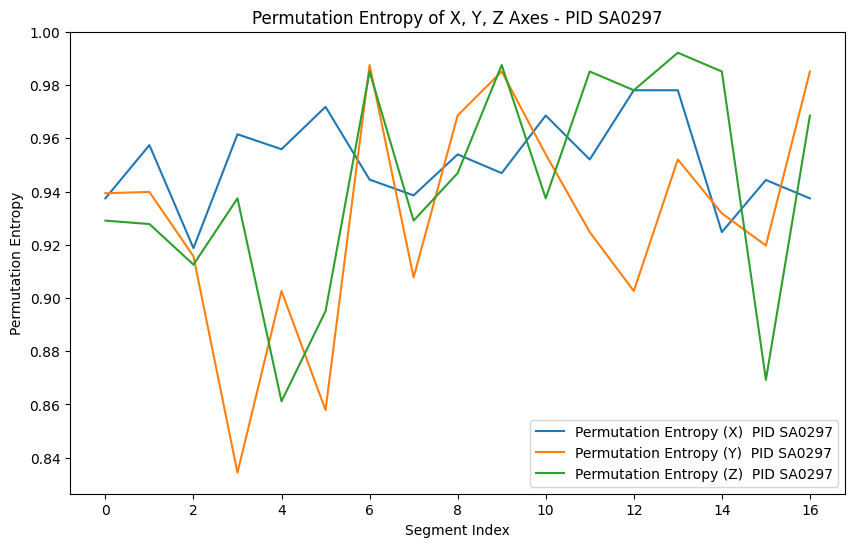

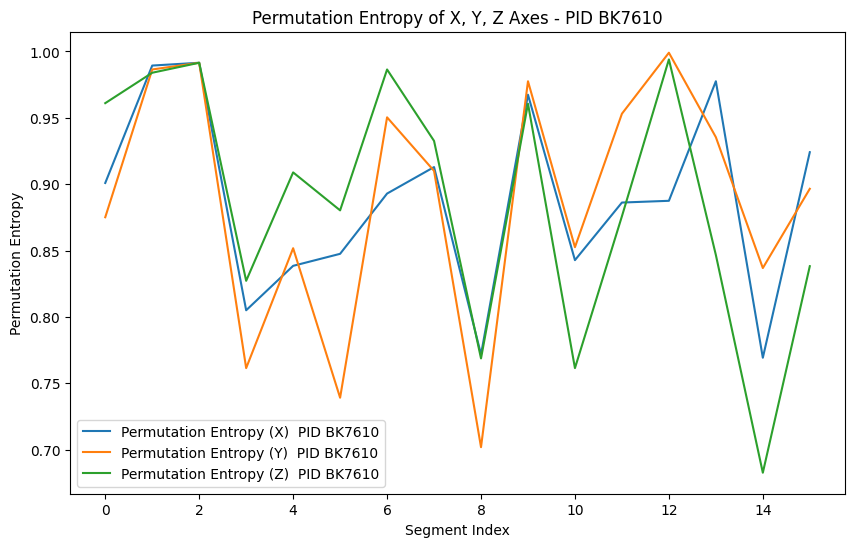

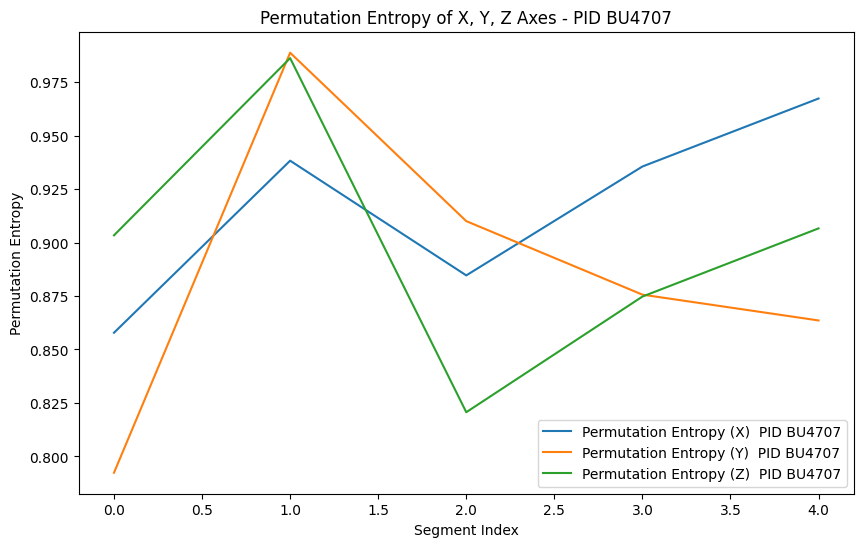

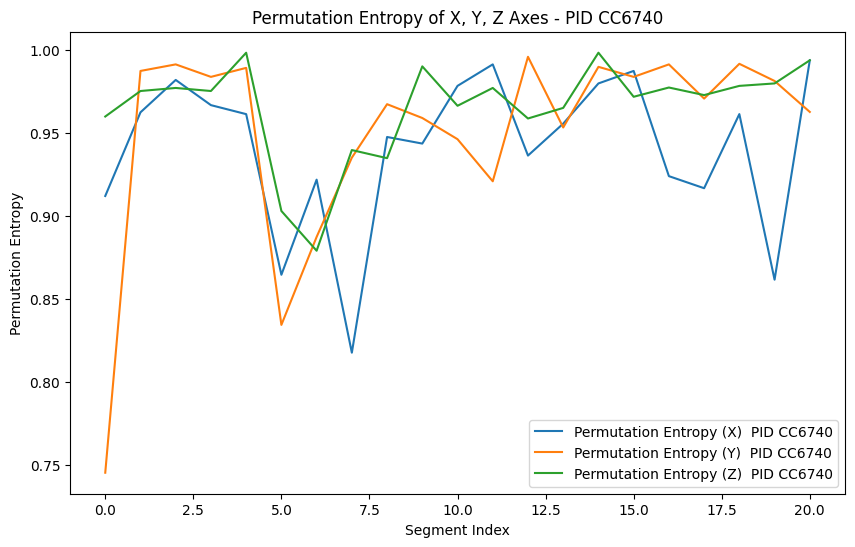

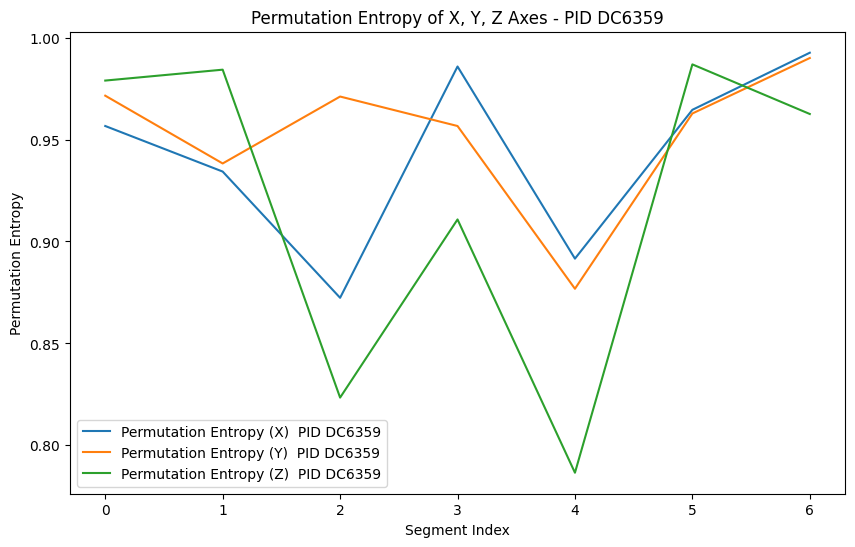

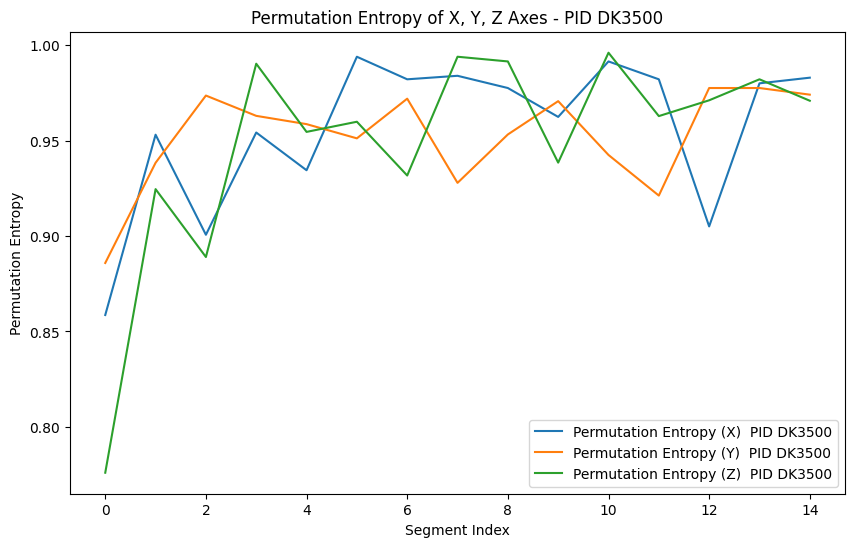

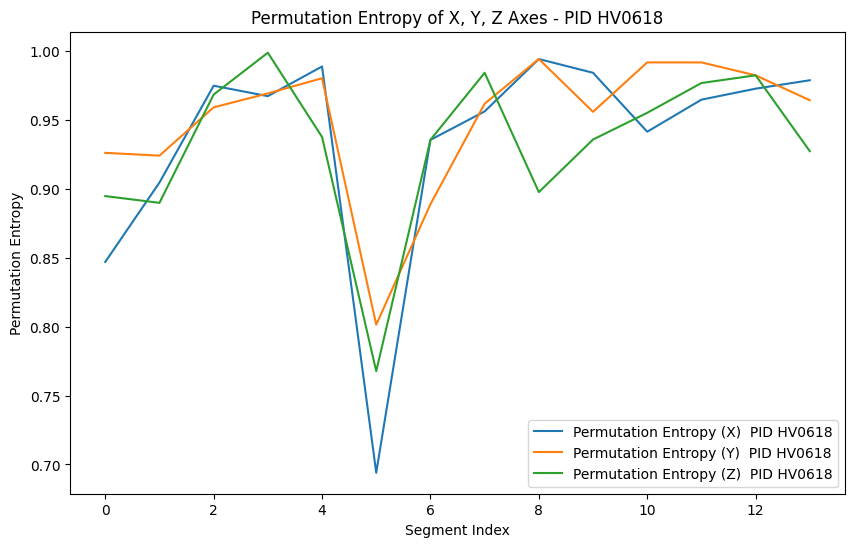

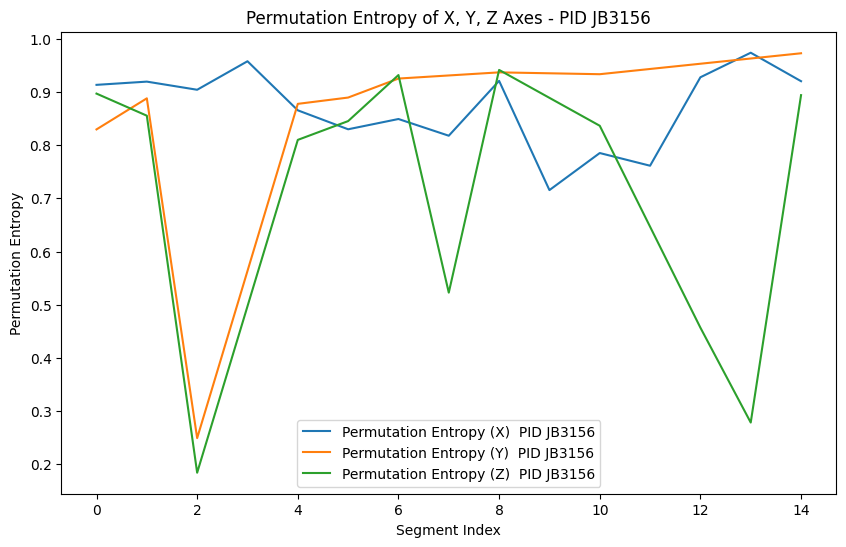

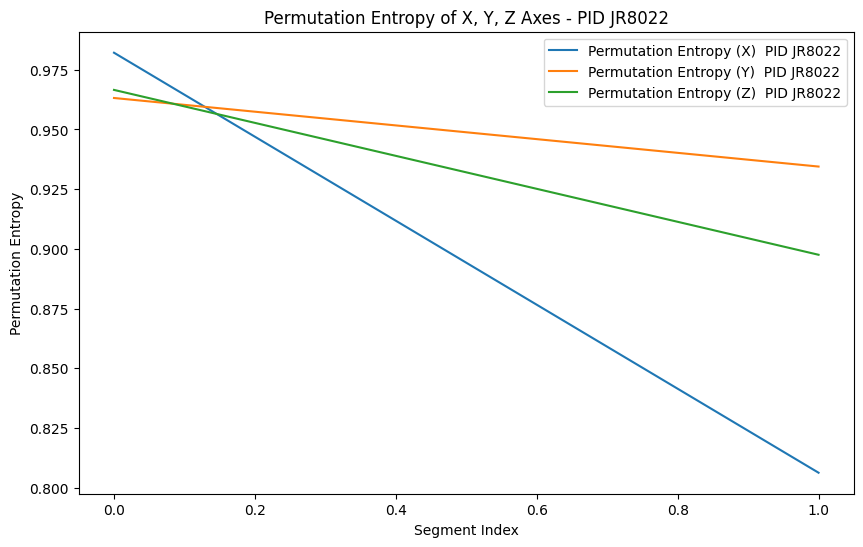

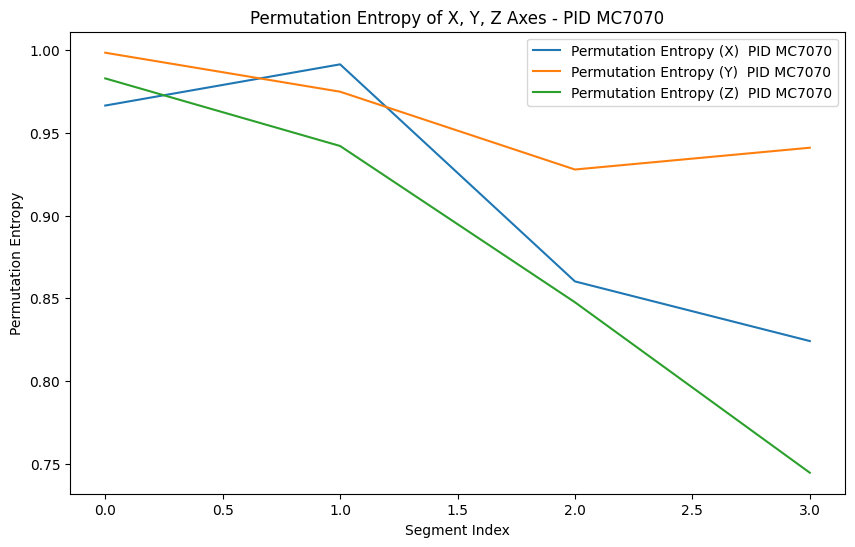

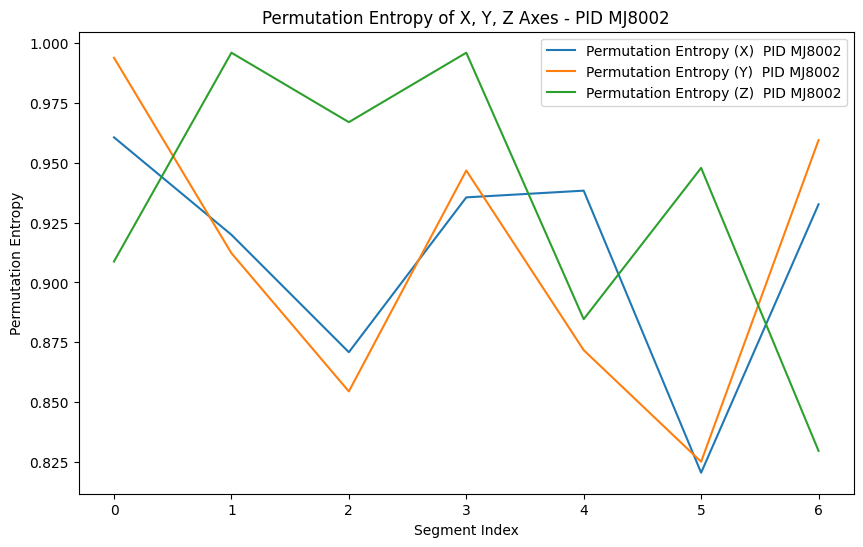

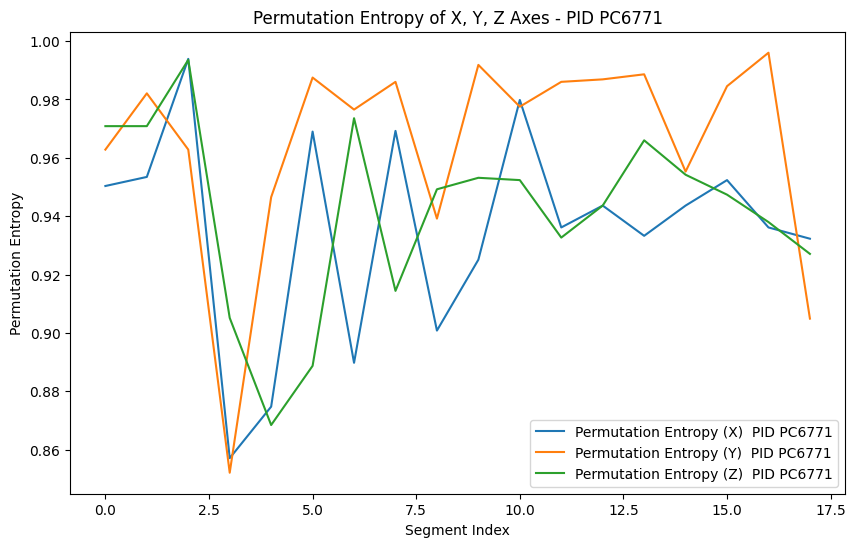

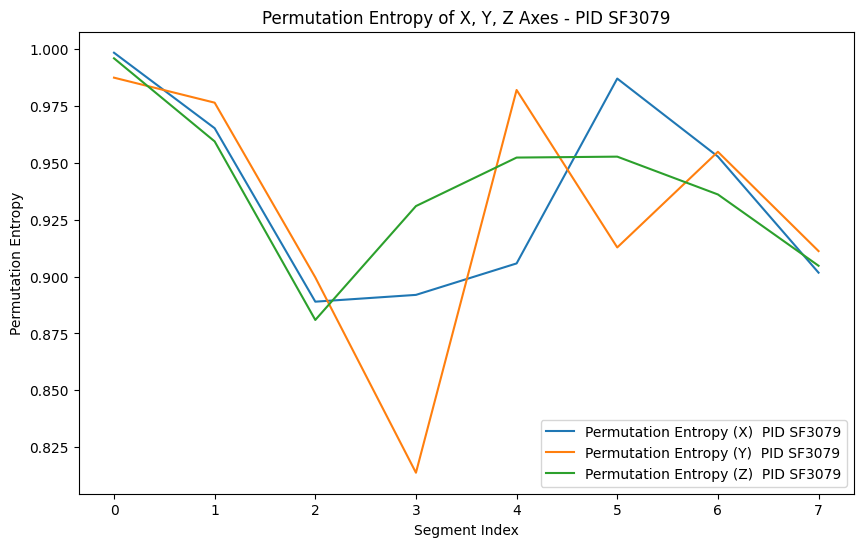

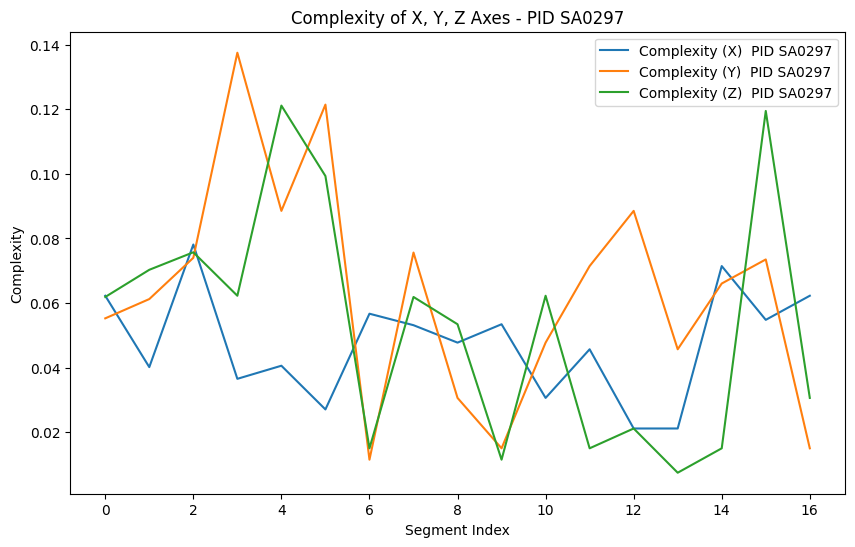

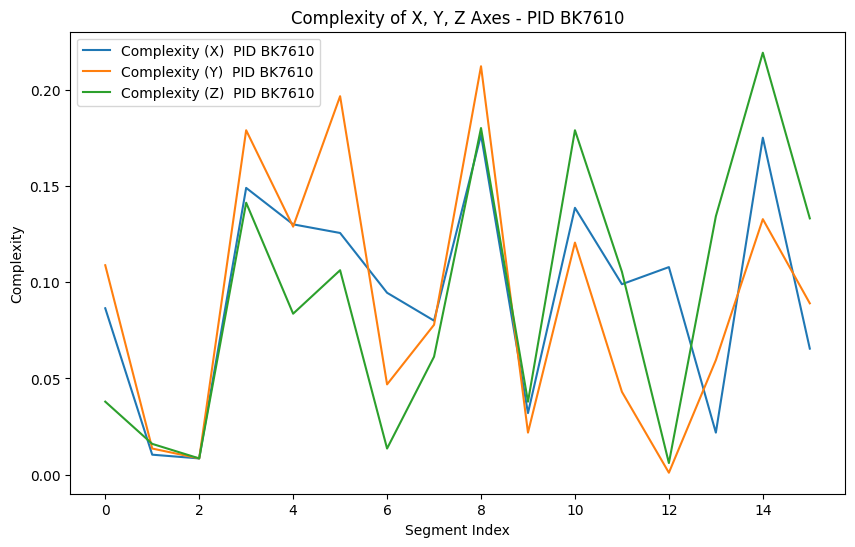

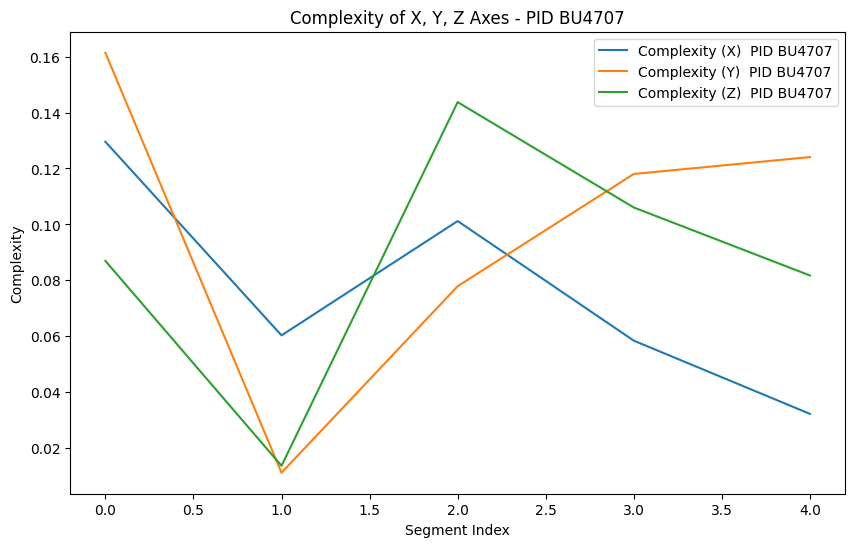

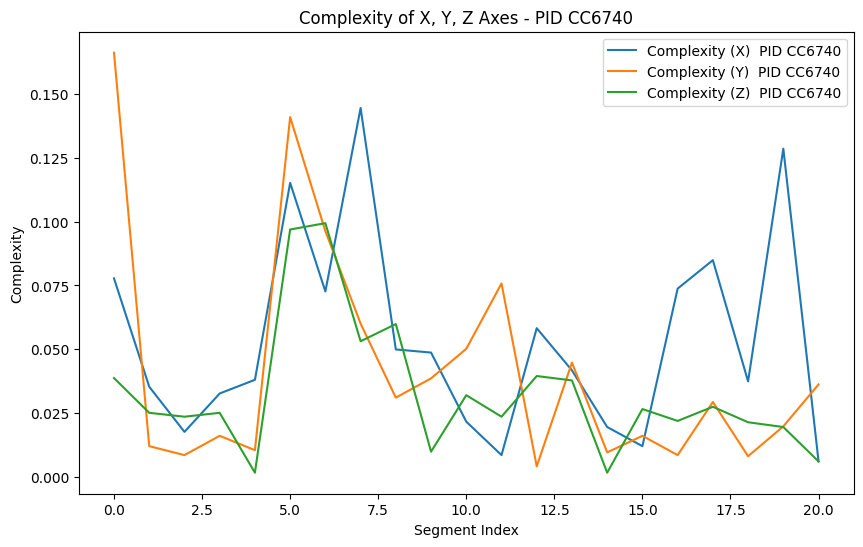

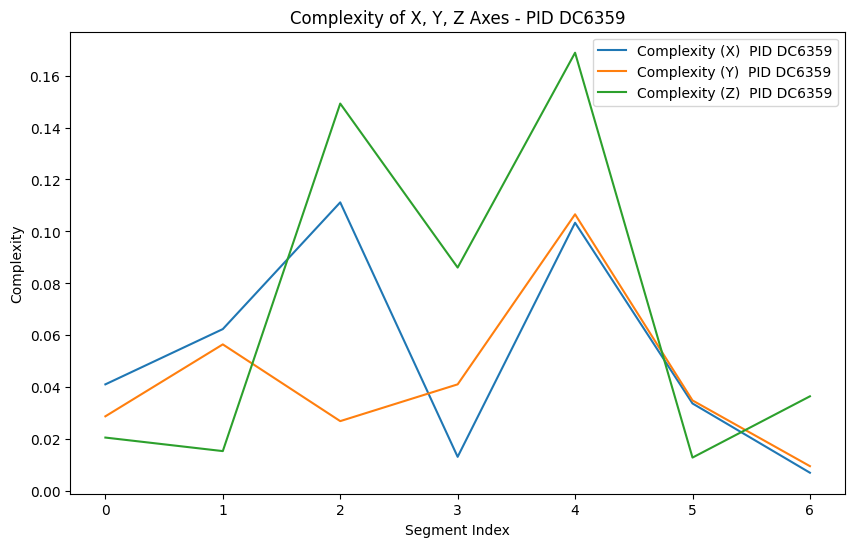

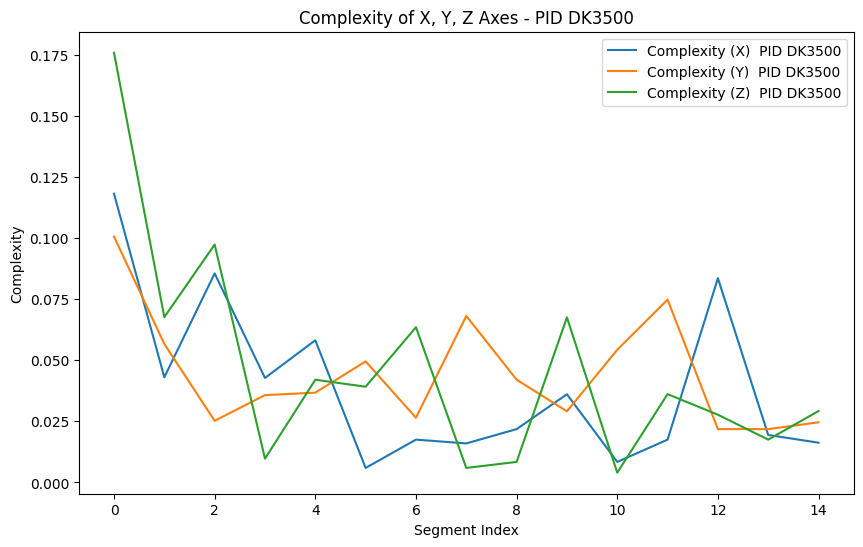

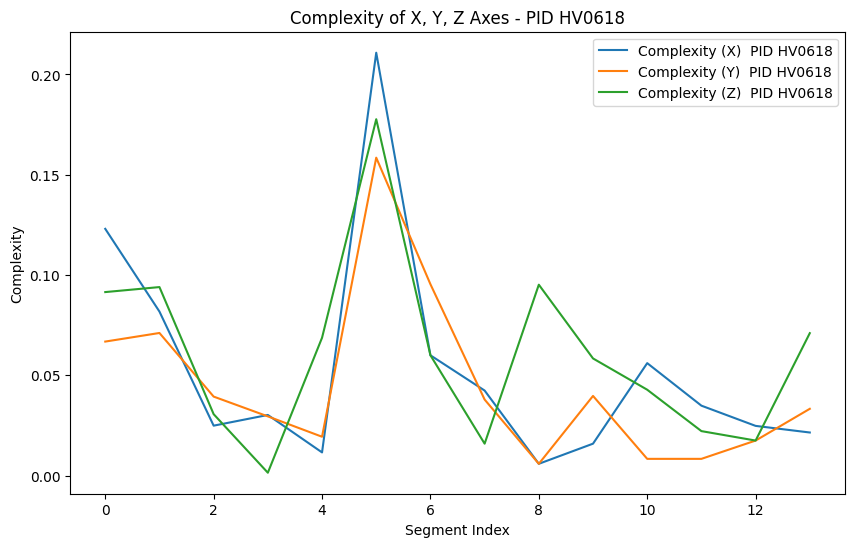

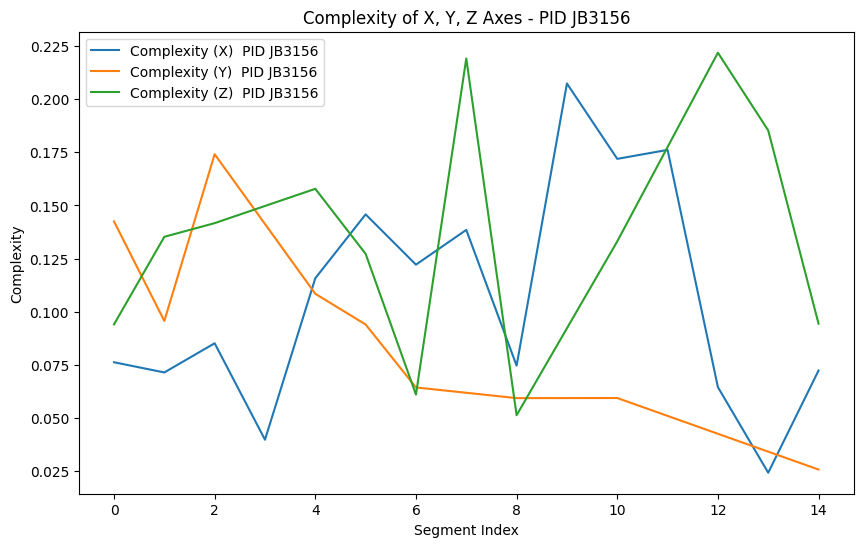

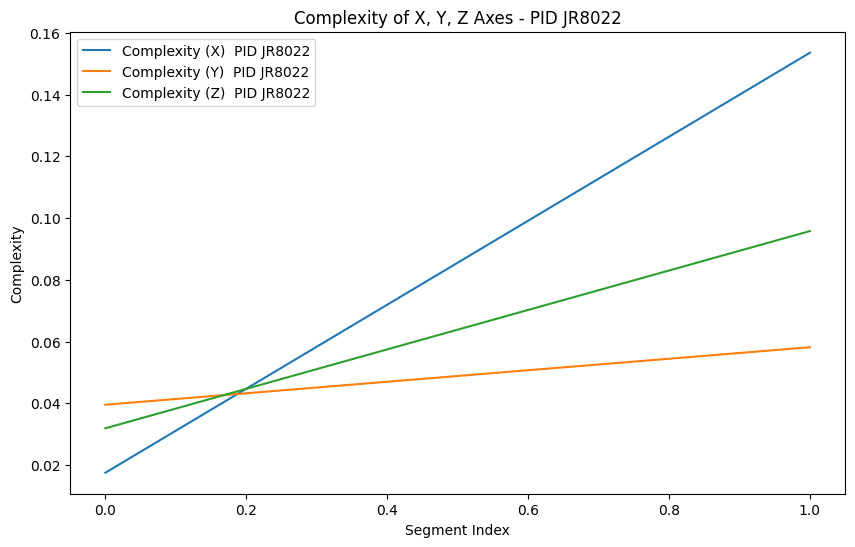

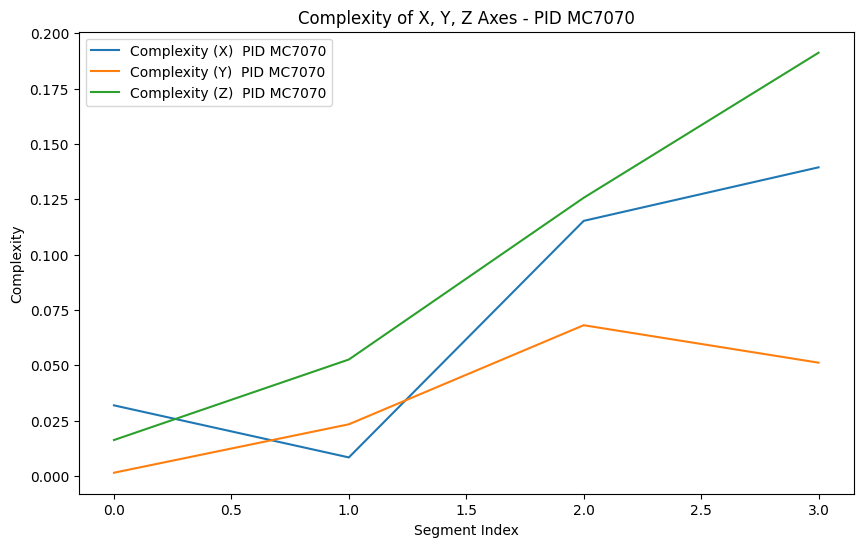

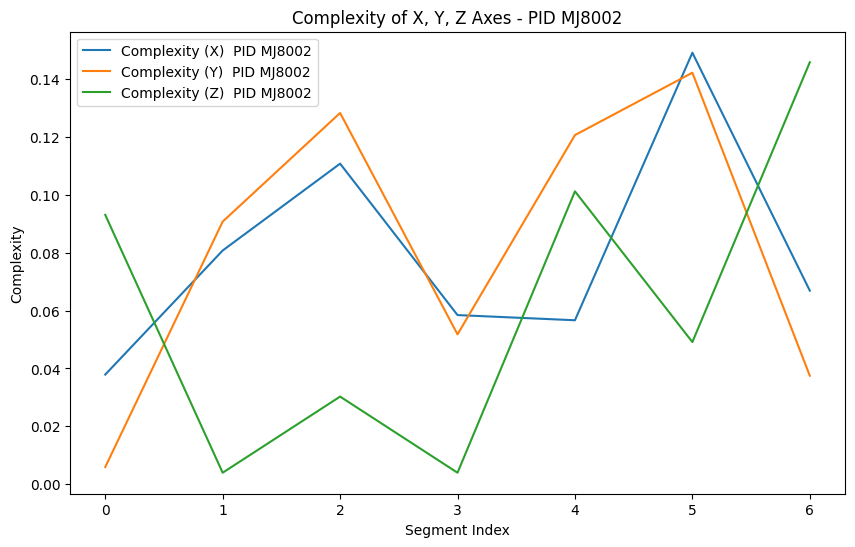

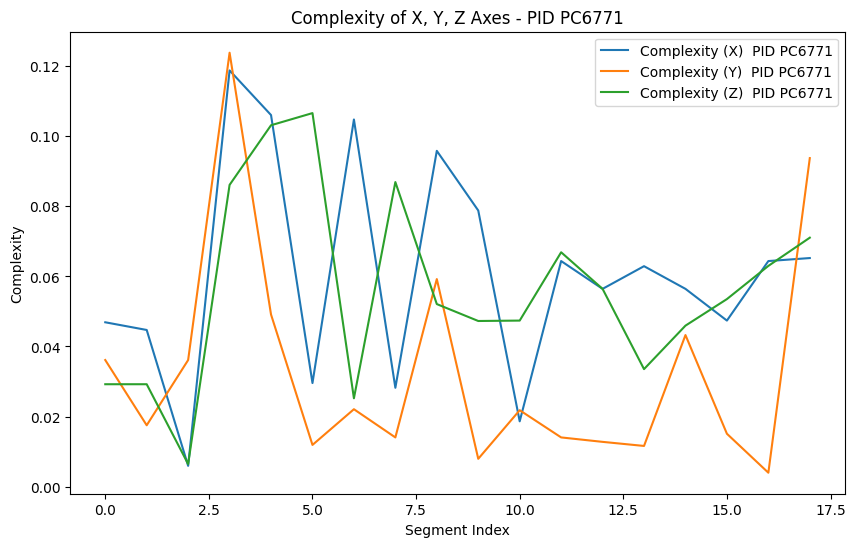

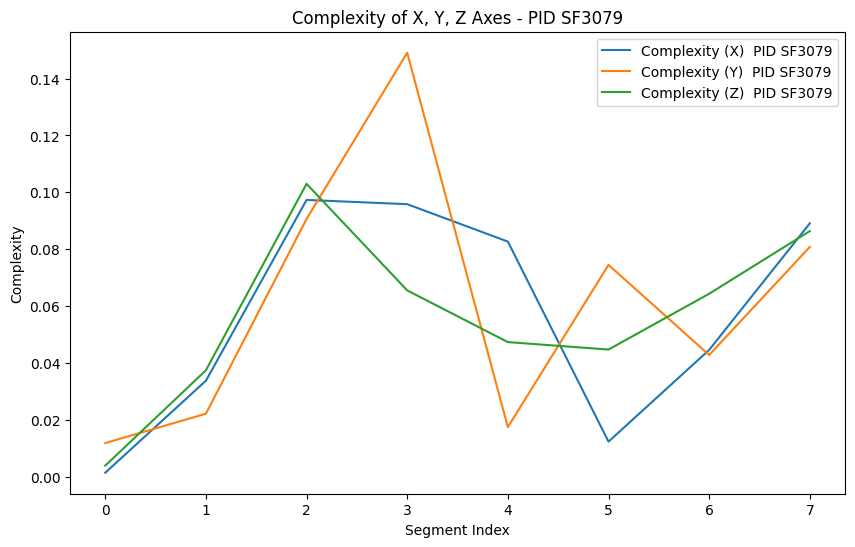

In [17]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

def s_entropy(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return sh_entropy

def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = np.array(ts)
    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:])

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return s_entropy(p) / max_entropy

def complexity(op):
    pe = p_entropy(op)
    constant1 = (0.5 + ((1 - 0.5) / len(op))) * np.log(0.5 + ((1 - 0.5) / len(op)))
    constant2 = ((1 - 0.5) / len(op)) * np.log((1 - 0.5) / len(op)) * (len(op) - 1)
    constant3 = 0.5 * np.log(len(op))
    Q_o = -1 / (constant1 + constant2 + constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5 * temp_op_prob) + (0.5 * (1 / len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return Comp_JS

# Define a function to calculate permutation entropy and complexity
def calculate_entropy_and_complexity(df_segment, axis):
    op = ordinal_patterns(df_segment[axis], 3, 1)
    pe = p_entropy(op)
    comp = complexity(op)
    return pe, comp

# Define the segment start and end indices based on changes in timestamp
segment_start_indices_dict = {}
for pid, merged_data_pid in merged_data_dict.items():
    segment_start_indices = [0]
    for i in range(1, len(merged_data_pid)):
        if merged_data_pid['TAC_Reading'].iloc[i] != merged_data_pid['TAC_Reading'].iloc[i-1]:
            segment_start_indices.append(i)
    segment_start_indices_dict[pid] = segment_start_indices

# Calculate entropy and complexity for each segment and axis for all PIDs
pe_results_dict = {}
comp_results_dict = {}
for pid, merged_data_pid in merged_data_dict.items():
    segment_start_indices = segment_start_indices_dict[pid]
    pe_results_pid = {'x': [], 'y': [], 'z': []}
    comp_results_pid = {'x': [], 'y': [], 'z': []}
    for i in range(1, len(segment_start_indices)):
        segment_start_index = segment_start_indices[i-1]
        segment_end_index = segment_start_indices[i]
        df_segment = merged_data_pid.iloc[segment_start_index:segment_end_index]

        # Calculate entropy and complexity for each axis
        pe_x, comp_x = calculate_entropy_and_complexity(df_segment, 'x')
        pe_y, comp_y = calculate_entropy_and_complexity(df_segment, 'y')
        pe_z, comp_z = calculate_entropy_and_complexity(df_segment, 'z')

        pe_results_pid['x'].append(pe_x)
        pe_results_pid['y'].append(pe_y)
        pe_results_pid['z'].append(pe_z)
        comp_results_pid['x'].append(comp_x)
        comp_results_pid['y'].append(comp_y)
        comp_results_pid['z'].append(comp_z)

    pe_results_dict[pid] = pe_results_pid
    comp_results_dict[pid] = comp_results_pid

# Plot permutation entropy results for each PID and axis
for pid, pe_results_pid in pe_results_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pe_results_pid['x'], label=f'Permutation Entropy (X)  PID {pid}')
    sns.lineplot(data=pe_results_pid['y'], label=f'Permutation Entropy (Y)  PID {pid}')
    sns.lineplot(data=pe_results_pid['z'], label=f'Permutation Entropy (Z)  PID {pid}')
    plt.xlabel('Segment Index')
    plt.ylabel('Permutation Entropy')
    plt.title(f'Permutation Entropy of X, Y, Z Axes - PID {pid}')
    plt.legend()
    plt.show()


for pid, comp_results_pid in comp_results_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=comp_results_pid['x'], label=f'Complexity (X)  PID {pid}')
    sns.lineplot(data=comp_results_pid['y'], label=f'Complexity (Y)  PID {pid}')
    sns.lineplot(data=comp_results_pid['z'], label=f'Complexity (Z)  PID {pid}')
    plt.xlabel('Segment Index')
    plt.ylabel('Complexity')
    plt.title(f'Complexity of X, Y, Z Axes - PID {pid}')
    plt.legend()
    plt.show()



In the code, permutation entropy is calculated to process the complexity of time-series data derived from accelerometer readings and TAC measurements.

### Ordinal Patterns Function
This function generates the ordinal patterns for a given time series.

### Permutation Entropy Calculation
The permutation entropy (p_entropy) is calculated based on the frequencies of these ordinal patterns. It's a measure of complexity of these patterns.

The formula for Shannon entropy is :

H(X)=−∑i=1np(xi)log2(p(xi))
Where:
•	H(X) is the Shannon entropy of the random variable X.
•	p(xi) is the probability of outcome xi.
•	log2 denotes the base-2 logarithm.

By comparing permutation entropy values across different segments and axes (x, y, z), we can identify periods of higher complexity in movement patterns.

# INSIGHTS AND CONCLUSION

While plotting the permutation entropy and complexity graphs , we see that the values of permutation entropy are near to 1, and this is the reason why it is difficult to interpret whether the person is sober or drunk with alcohol.The permutation entropy close to 1 means patterns are complex.